# KOSPI와 다우존스 지수 비교
## pandas_datareader를 이용하여 yahoo 데이터 가져오기

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


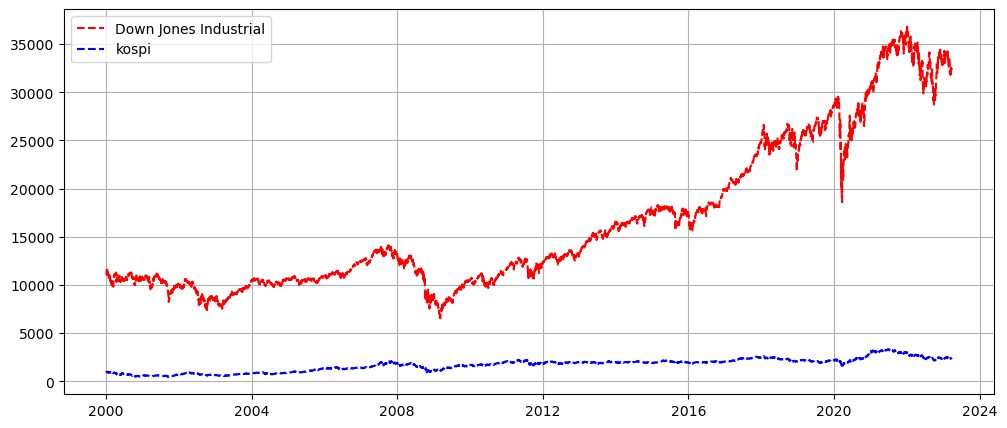

In [1]:
# 야후 주식심볼 기호 다우지소 : ^DJI 코스피 : ^KS11
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()


dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')
import matplotlib.pyplot as plt

# 'r--'붉은 점선 'b'푸른 점선
plt.figure(figsize=(12,5))
plt.plot(dow.index, dow.Close, 'r--', label="Down Jones Industrial")
plt.plot(kospi.index, kospi.Close, 'b--', label="kospi")
plt.grid(True)
plt.legend(loc="best")

## 지수화 비교
### 일별 종가만으로는 KOSPI와 다우존스 지수의 상관관계를 비교하기 어려움
### 그러므로 현재 종가를 특정 시점의 종가와 나누어 변동률을 구해봄

In [2]:
# 지수화
d=(dow.Close / dow.Close.loc['2000-01-04'])*100
k=(kospi.Close / kospi.Close.loc['2000-01-04'])*100
k

Date
2000-01-04    100.000000
2000-01-05     93.132456
2000-01-06     90.722725
2000-01-07     89.576408
2000-01-10     93.220271
                 ...    
2023-03-23    228.931853
2023-03-24    228.032923
2023-03-27    227.490924
2023-03-28    229.919536
2023-03-29    230.767472
Name: Close, Length: 5732, dtype: float64

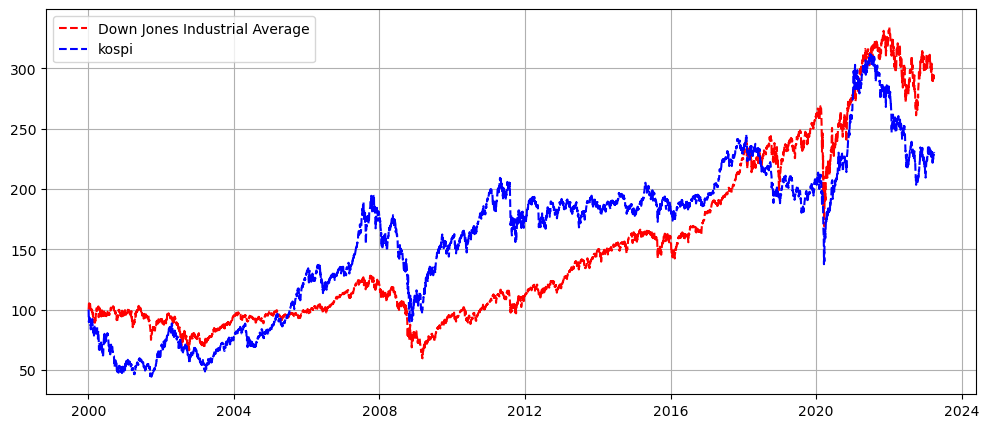

In [4]:
# 그래프 그려보기
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(d.index, d, 'r--', label="Down Jones Industrial Average")
plt.plot(k.index, k, 'b--', label="kospi")
plt.grid()
plt.legend(loc="best")
plt.show()

## 산점도 분석

In [6]:
import pandas as pd
from pandas_datareader import data as pdr

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

# 다우존스 지수의 종가 칼럼과 코스피 지수의 종가 칼럼으로 데이터 프레임을 생성
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})

# NaN 제거
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2023-03-23,32105.250000,2424.479980
2023-03-24,32237.529297,2414.959961
2023-03-27,32432.080078,2409.219971


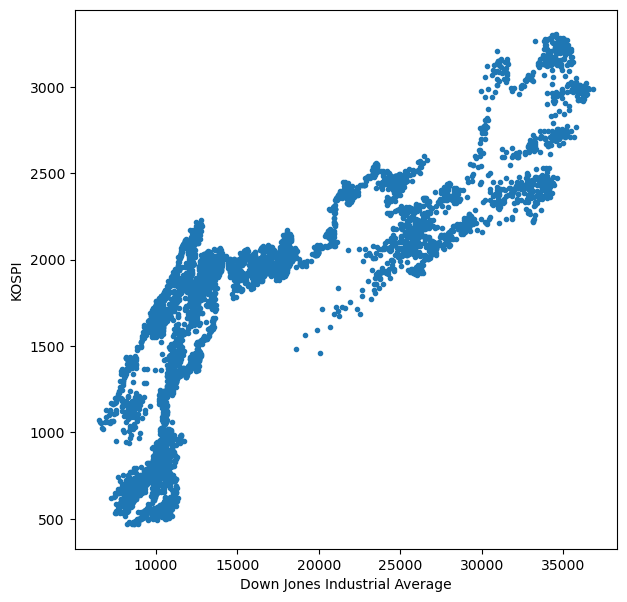

In [7]:
# 산점도 그리기


import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'],df['KOSPI'],marker='.')
plt.xlabel("Down Jones Industrial Average")
plt.ylabel("KOSPI")
plt.show()